In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np
import pandas as pd
import os

In [2]:
housing_combined_data_df = pd.read_csv(r"https://raw.githubusercontent.com/chaenii989/Final_Project_What_is_Affecting_US_Housing_Market/main/etl/housing_combined_data.csv")
housing_combined_data_df.columns

Index(['date', 'interest_rate', 'units_authorized_started', 'avg_home_price',
       'homeownership_rate', 'lumber_price_index', 'house_supply',
       'new_housing_permits', 'steel_price_index', 'under_construction',
       'units_completed'],
      dtype='object')

In [3]:
# Multivariate Linear Regression for Time-Series Data with Machine Learning

def MultivariateLinearRegression(df, target_column):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    # Clean DataFrame
    df = df.dropna()
    df = df.drop_duplicates()

    # Transform DataFrame
    df["y_actual_output"] = df[target_column]
    del df[target_column]
    df = df.set_index("date")

    data = {}

    last_col = len(df.iloc[0,:])
    last_row = len(df.iloc[:,0])
    
    print(f"Number of Columns: {last_col}")
    print(f"Number of Rows: {last_row}")

    for i in range(0, (last_col - 1)):
        list = df.iloc[:, i].astype("float").to_list()
        x_list = [0]
        for x in list:
            x_list.append(x)
        data[f'X{i+1}'] = f'X{i+1}'
        data[f'X{i+1}'] = x_list

    y_list = df.iloc[:, last_col - 1].astype("float").to_list()
    y_list.append(0)
    data['Y'] = y_list

    ml_df = pd.DataFrame(data)

    last_row = len(ml_df.iloc[:,1])
    last = len(ml_df.iloc[0,:])
    ml_df = ml_df.drop(0, inplace=False).drop(last_row - 1, inplace=False)

    # Assign data to X and y
    X = ml_df.iloc[:,0:last-1]
    y = ml_df["Y"].values.reshape(-1, 1)

    print("Shape: ", X.shape, y.shape)

    # Train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Linear regression model
    model = LinearRegression()

    # Fit model with all features in X for R2 score
    model.fit(X, y)
    score = model.score(X, y)

    print(f"R2 Score: {score}")

    # Fit model for training and testing scores
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)

    print(f"Training Score: {training_score}")
    print(f"Testing Score: {testing_score}")

    # Coefficient and the intercept
    weight_coefficients = model.coef_
    y_axis_intercept = model.intercept_

    print(f"Weight coefficients: {weight_coefficients}")
    print(f"Y-Axis Intercept: {y_axis_intercept}")

    # X value min & max
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])

    print(f"Min X Value: {x_min}")
    print(f"Max X Value: {x_max}")

    # Predictions
    predictions = model.predict(X)
    prediction_error = predictions - y
    predicted_output = predictions
    actual_output = y
    most_recent_value = len(actual_output) - 1
    max_error = max(prediction_error)
    min_error = min(prediction_error)

    print(f"Actual Output: {y[most_recent_value]}")
    print(f"Predicted Output: {predictions[most_recent_value]}")
    print(f"Prediction Error: {predictions[most_recent_value]-y[most_recent_value]}")
    print(f"Max Prediction Error: {max_error}")
    print(f"Min Prediction Error: {min_error}")

    # Plot residuals for training and testing data
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="red", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y.min(), xmax=y.max() )
    plt.title("Training and Testing Residuals Plot")
    plt.xlabel('Prediction')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig("app/static/images/residuals_plot_ml_multivariate_linear_regression.png")
    plt.savefig("machine_learning_output/residuals_plot_ml_multivariate_linear_regression.png")

    plt.show()

    # Build predicted values dataframe
    df = df.reset_index(drop=False)
    predicted_df = df.drop(axis = 0, index = 0, inplace = False)
    predicted_df = predicted_df.reset_index(drop=True)
    predicted_df["predicted"] = predicted_output
    predicted_df["error"] = prediction_error

    # Write Output to CSV
    predicted_df.to_csv('machine_learning_output/output_ml_multivariate_linear_regression.csv')

    # Write Results to Txt
    file_to_output = os.path.join("machine_learning_output", "results_ml_multivariate_linear_regression.txt")
    with open(file_to_output, "w") as txt_file:
        results_ml_multivariate_linear_regression = (
            f"----------------------------------------------------------------------------------------\n"
            f"Multivariate Linear Regresssion on Time-Series Data with Machine Learning\n"
            f"----------------------------------------------------------------------------------------\n"
            f"Original Dataset Length:\n"
            f"Number of Columns: {last_col}\n"
            f"Number of Rows: {last_row}\n"
            f"Shape: {X.shape}, {y.shape}\n"
            f"----------------------------------------------\n"
            f"Machine Learning Results\n"
            f"----------------------------------------------\n"
            f"Scores:\n"
            f"R2 Score: {score}\n"
            f"Training Score: {training_score}\n"
            f"Testing Score: {testing_score}\n"
            f"----------------------------------------------\n"
            f"Values:\n"
            f"Weight Coefficients: {weight_coefficients}\n"
            f"Y-Axis Intercept: {y_axis_intercept}\n"
            f"Min X Value: {x_min}\n"
            f"Max X Value: {x_max}\n"
            f"----------------------------------------------\n"
            f"Predictions:\n"
            f"Actual Output: {y[most_recent_value]}\n"
            f"Predicted Output: {predictions[most_recent_value]}\n"
            f"Prediction Error: {predictions[most_recent_value]-y[most_recent_value]}\n"
            f"Max Prediction Error: {max_error}\n"
            f"Min Prediction Error: {min_error}\n"
            f"----------------------------------------------------------------------------------------\n")
        txt_file.write(results_ml_multivariate_linear_regression)

    # Generate path to csv
    csv_path = os.path.join('machine_learning_output', 'output_ml_multivariate_linear_regression.csv')
    ml_output_csv = pd.read_csv(csv_path)

    # Create html table and save to templates 
    ml_output_csv.to_html(buf='app/templates/mltable.html', index=True, classes=['table', 'table-hover'], table_id='predictedTable')

    return predicted_df

In [4]:
# Line Graph

def LineFunction(predicted_df):

    # Assign x and y axis
    x_axis = predicted_df["date"].to_list()
    y_axis_a = predicted_df["y_actual_output"].to_list()
    y_axis_p = predicted_df["predicted"].to_list()

    # Graph figure size
    plt.figure(figsize=(20,8))

    # Set x limits
    plt.xlim('1990-01-01', '2021-04-01')

    # Plot lines
    plt.plot(x_axis, y_axis_a) # First line
    plt.plot(x_axis, y_axis_p) # Second line

    # Asthetics
    line_one,=plt.plot(x_axis, y_axis_a, color='blue', linewidth=1, label="Actual Value")
    line_two,=plt.plot(x_axis, y_axis_p, color='red', linewidth=1, label="Predicted Value")
    plt.legend(handles=[line_one, line_two],loc="best",fontsize="large", fancybox=True)
    plt.xticks(x_axis, rotation=90)
    plt.title("Actual vs. Predicted Values")
    plt.xlabel('Date by Quarter')
    plt.ylabel('Output Value')
    plt.tight_layout()
    plt.savefig("app/static/images/line_plot_ml_multivariate_linear_regression.png")
    plt.savefig("machine_learning_output/line_plot_ml_multivariate_linear_regression.png")

    plt.show()

    return predicted_df

Number of Columns: 10
Number of Rows: 125
Shape:  (124, 9) (124, 1)
R2 Score: 0.9759803211622585
Training Score: 0.9737840620637132
Testing Score: 0.9787881279050938
Weight coefficients: [[-1.75035299e+04 -7.05863389e+01 -3.05670596e+03 -1.02152948e+01
  -6.36429120e+03  6.30851833e-01  2.92284833e+02  2.10778383e+02
  -3.14356886e+01]]
Y-Axis Intercept: [451413.83352829]
Min X Value: [[[  2.76 526.    63.1   51.38   4.   539.   107.83 416.   559.  ]]]
Max X Value: [[[  10.32 2120.     69.4   147.59   11.   2228.    287.17 1423.
   2110.  ]]]
Actual Output: [347500.]
Predicted Output: [349304.18131732]
Prediction Error: [1804.18131732]
Max Prediction Error: [26488.53383156]
Min Prediction Error: [-20923.00820813]


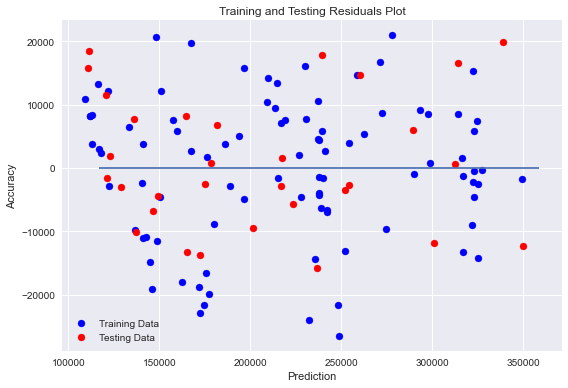

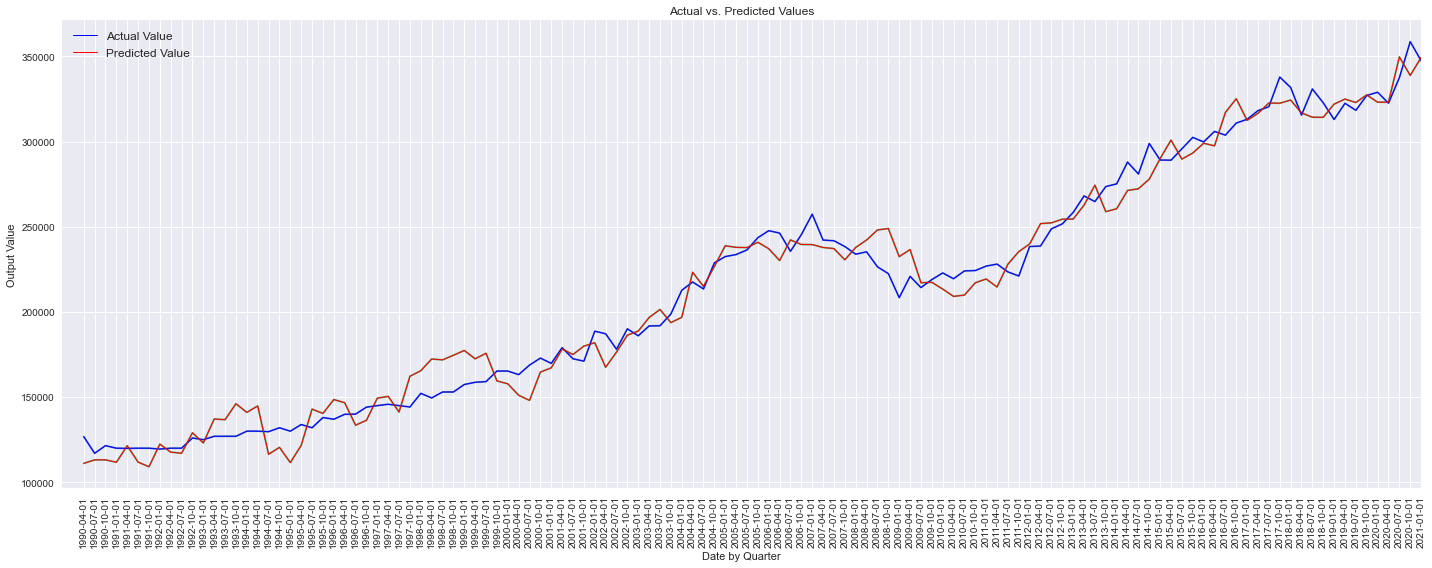

,date,interest_rate,units_authorized_started,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed,y_actual_output,predicted,error
0,1990-04-01,10.32,1212,63.9,56.64,8.0,1104,117.47,859,1315,126800.0,111076.474991,-15723.525009
1,1990-07-01,10.10,1132,63.9,54.72,8.0,1041,117.87,812,1305,117000.0,113162.187048,-3837.812952
2,1990-10-01,9.96,1043,64.0,51.38,8.0,909,117.07,756,1234,121500.0,113164.427274,-8335.572726
3,1991-01-01,9.50,895,64.0,51.48,8.0,850,116.47,701,1138,120000.0,111736.798268,-8263.201732
4,1991-04-01,9.52,1011,64.1,56.66,7.0,957,114.47,662,1085,119900.0,121446.602560,1546.602560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2020-01-01,3.52,1485,65.3,101.60,6.0,1470,210.60,1209,1283,329000.0,323166.614940,-5833.385060
120,2020-04-01,3.24,1086,68.1,100.00,5.0,1212,203.90,1187,1204,322600.0,323135.788535,535.788535
121,2020-07-01,2.95,1440,67.3,145.00,4.0,1551,202.17,1210,1327,337500.0,349747.811941,12247.811941
122,2020-10-01,2.76,1575,65.7,147.59,4.0,1683,216.40,1246,1329,358700.0,338875.758451,-19824.241549


In [5]:
LineFunction(MultivariateLinearRegression(housing_combined_data_df, "avg_home_price"))